In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
%matplotlib inline
import pandas as pd
from matplotlib.lines import Line2D
from scipy.stats import linregress 

In [2]:
pd.option_context('display.precision', 10)
pd.set_option('display.float_format', '{:.10f}'.format)

In [3]:
df=pd.read_csv("classified_lcs\grs1915_lc530.txt",sep="	",skiprows=[0, 1], header=None)

In [4]:
n=len(df)

In [5]:
df.columns = ['time', 'total','low','mid','high'] #time in seconds

In [6]:
df

,time,total,low,mid,high
0,180995616.0624997616,4010.6667861938,2330.6667361259,810.6666908264,296.0000000000
1,180995616.1874992847,3970.6667850018,2152.0000641346,874.6666927338,216.0000000000
2,180995616.3124988079,4109.3334558010,2221.3333995342,882.6666929722,240.0000000000
3,180995616.4374983609,3688.0001099110,2101.3333959579,754.6666891575,224.0000000000
4,180995616.5624978542,3821.3334472179,2269.3334009647,674.6666867733,264.0000000000
...,...,...,...,...,...
26490,180998927.2998683453,3901.3334496021,2328.0000693798,720.0000214577,128.0000000000
26491,180998927.4248678386,4008.0001194477,2330.6667361259,696.0000207424,248.0000000000
26492,180998927.5498673618,4117.3334560394,2408.0000717640,824.0000245571,264.0000000000
26493,180998927.6748668849,4256.0001268387,2568.0000765324,832.0000247955,176.0000000000


In [7]:
df["total"] - (df["low"] + df["mid"])

0        869.3333592415
1        944.0000281334
2       1005.3333632946
3        832.0000247955
4        877.3333594799
              ...      
26490    853.3333587646
26491    981.3333625793
26492    885.3333597183
26493    856.0000255108
26494    901.3333601952
Length: 26495, dtype: float64

In [8]:
#time step is 0.125 sec

In [9]:
low=np.array(list(df["low"]))
mid=np.array(list(df["mid"]))
high=np.array(list(df["high"]))

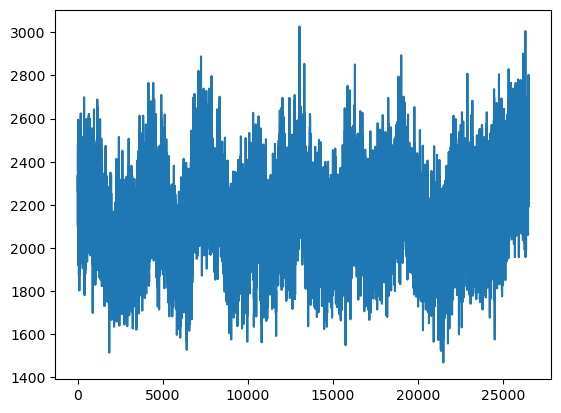

In [10]:
plt.plot(range(len(low)),low)
plt.show()

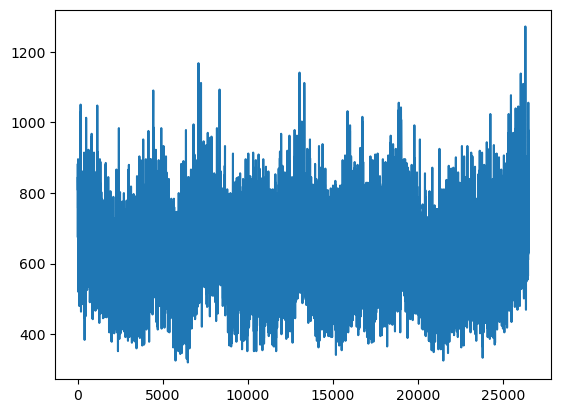

In [11]:
plt.plot(range(len(mid)),mid)
plt.show()

Null Hypothesis: a and b are compatible <br/>
    1) Get the distribution of (a-b)/sqrt(2*N)
         <pre>( since N isnt given,we use the estimator N=(a+b)/2 )</pre>
    2) Expect a normal gaussian,check summary statistic: average and sigma<br/>
    3) do same for all files,get histogram for all Lc_i<br/>
    4) make a simulation and check the expected vs the obsered

In [12]:
np.std(low)

192.64849326206473

In [13]:
np.std(mid)

109.14326190337215

In [14]:
np.mean(low)

2135.227188249434

In [15]:
np.mean(mid)

629.0307037814875

In [16]:
x=(low[4000:]-mid[4000:])/np.sqrt(low[4000:]+mid[4000:])

In [17]:
np.std(x)

1.7605084919134186

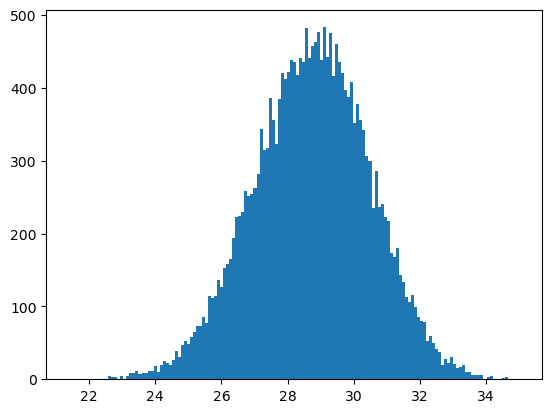

In [18]:
plt.hist(x,int(np.sqrt(len(x))))
plt.show()

In [21]:
total=0
for i in range(len(x)):
    if(x[i]>0):
        total+=1
print(total)
print(total/n)

22495
0.8490281185129269


26495


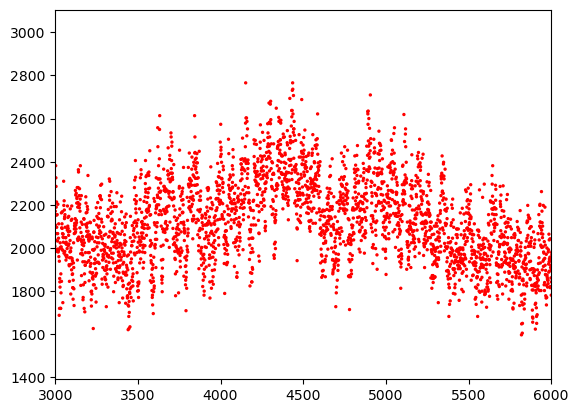

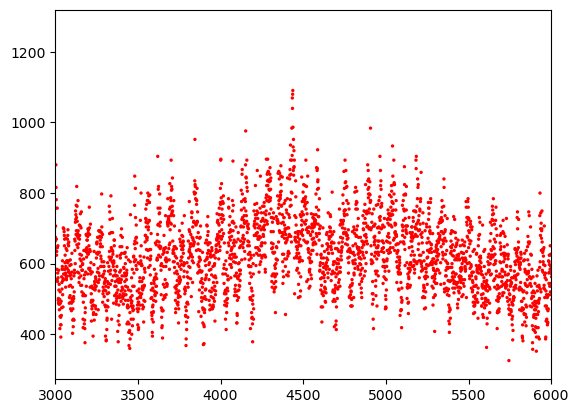

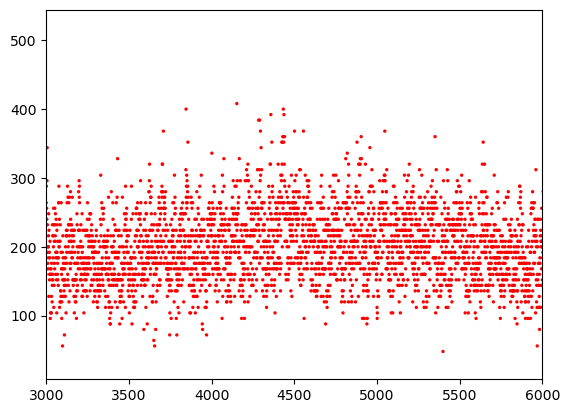

In [22]:
color=[]
list_=[]
r=0
for i in range(len(low)):
    if low[i]>=mid[i]: 
        color.append("red")
        r+=1
    else:
        color.append("blue")
        list_.append(i)


print(r)
plt.scatter(range(len(low)),low,c=color,s=2)

#plt.figure(figsize=(12, 6))  # Width is 12, Height is 6 (default is usually (6, 4))
plt.xlim(3000,6000)
#mplcursors.cursor()  # Enable zoomable interactivity
plt.show()
#plt.clear()
plt.scatter(range(len(low)),mid,c=color,s=2)
plt.xlim(3000,6000)
plt.show()
#
plt.scatter(range(len(high)),high,c=color,s=2)
plt.xlim(3000,6000)
plt.show()

26495


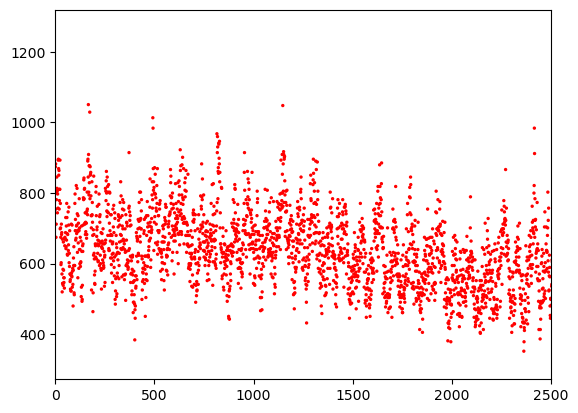

In [23]:
color=[]
list_=[]
r=0
for i in range(len(mid)):
    if low[i]>=mid[i]: 
        color.append("red")
        r+=1
    else:
        color.append("blue")
        list_.append(i)
        
print(r)
plt.scatter(range(len(low)),mid,c=color,s=2)
#plt.figure(figsize=(12, 6))  # Width is 12, Height is 6 (default is usually (6, 4))
plt.xlim(0,2500)
#mplcursors.cursor()  # Enable zoomable interactivity
plt.show()

In [24]:
len(low)

26495